In [13]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data_num = 1
imu = io.loadmat('imu/imuRaw'+str(data_num)+'.mat')
accel = imu['vals'][0:3,:] # order: roll, pitch, yaw
gyro = imu['vals'][3:6,:]
T = np.shape(imu['ts'])[1]
ts_imu = imu['ts'].reshape(-1,)
angle_names = ['roll', 'pitch', 'yaw']


accel_alpha = 34.75
accel_beta = 500
accel_imu = (accel - np.ones(accel.shape) * accel_beta) * 3300 / (1023* accel_alpha) 
accel_adjusted = np.vstack([accel_imu[0,:]*(-1), accel_imu[1,:]*(-1), accel_imu[2,:]])



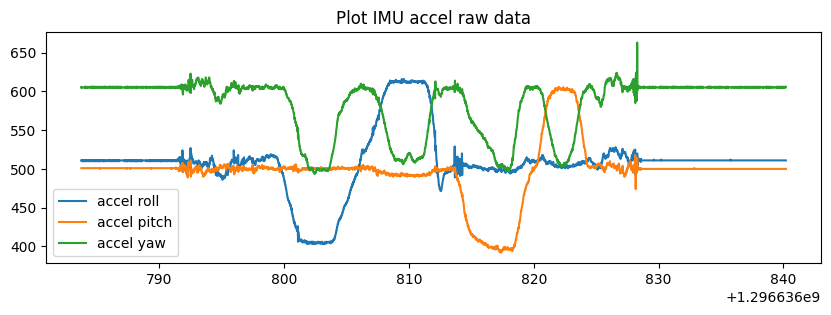

In [25]:
plt.figure(figsize = (10,3))
for i in range(3):
    plt.plot(ts_imu, accel[i,:], label = 'accel '+ angle_names[i])
plt.title('Plot IMU accel raw data')
plt.legend()

this adjustment is wrong! a_z around 9.8, ay, ax around 0

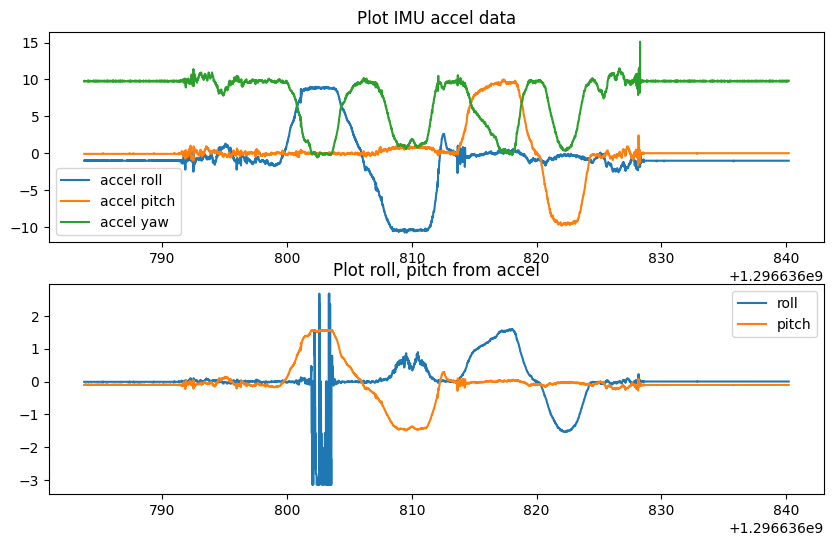

In [15]:
from estimate_rot import rotation_angles, accel_2_euler

euler_accel = accel_2_euler(accel_adjusted) 

plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
for i in range(3):
    plt.plot(ts_imu, accel_adjusted[i,:], label = 'accel '+ angle_names[i])
plt.title('Plot IMU accel data')
plt.legend()

plt.subplot(2,1,2)
for i in range(2):
    plt.plot(ts_imu, euler_accel[i,:], label = angle_names[i])
plt.title('Plot roll, pitch from accel')
plt.legend()

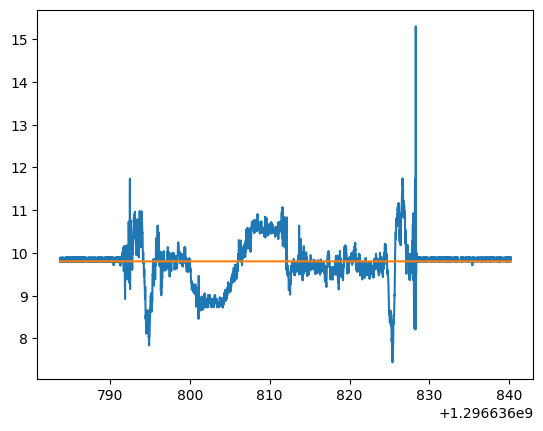

1.0000390086411757

In [16]:
# In this codeblock, we check the magnitude of the accel data. We want to make sure the norm of accel data to be close to 9.8. Then we can get a approx value for accel_alpha
magnitude = np.hstack([ np.sqrt(accel_adjusted[0,t]**2+accel_adjusted[1,t]**2+accel_adjusted[2,t]**2) for t in range(np.shape(accel)[1]) ])
plt.plot(ts_imu, magnitude)
plt.plot(ts_imu, np.ones((np.shape(accel)[1]))*np.median(magnitude))
plt.show()
np.median(magnitude)/9.8

In [17]:
vicon = io.loadmat('vicon/viconRot'+str(data_num)+'.mat')
T_vicon = np.shape(vicon['ts'])[1]
ts_vicon = vicon['ts'].reshape(-1,)

euler_vicon = np.vstack([rotation_angles(vicon['rots'][:,:,t]) for t in range(T_vicon)]).transpose()

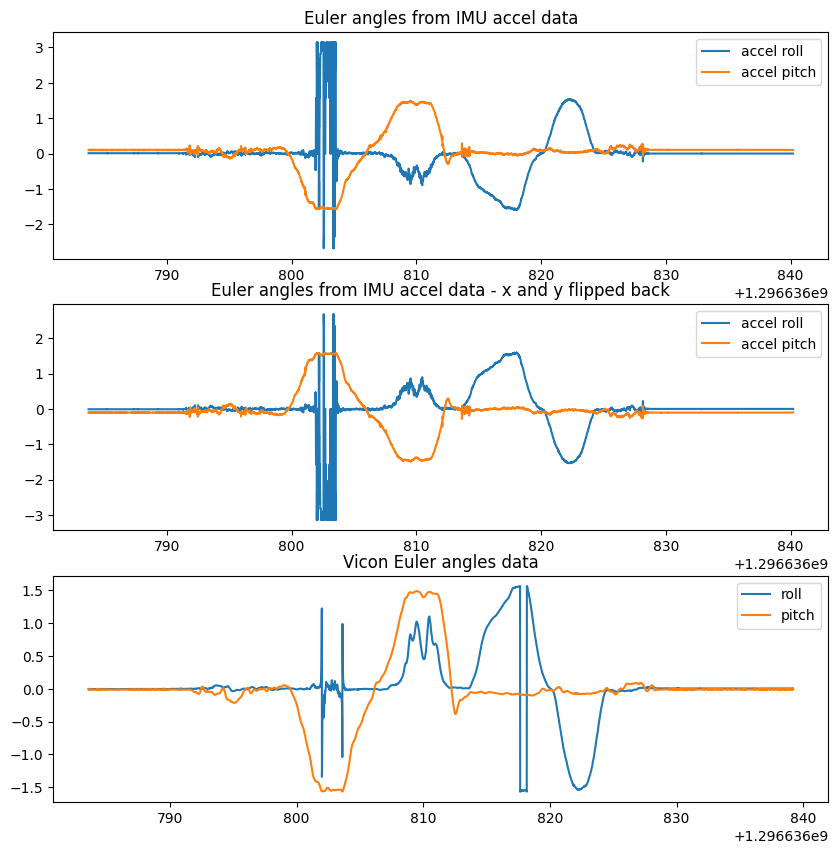

In [22]:
euler_accel_imu = accel_2_euler(accel_imu) 
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
for i in range(2):
    plt.plot(ts_imu, euler_accel_imu[i,:], label = 'accel '+ angle_names[i])
plt.title('Euler angles from IMU accel data')
plt.legend()

plt.subplot(3,1,2)
for i in range(2):
    plt.plot(ts_imu, euler_accel[i,:], label = 'accel '+ angle_names[i])
plt.title('Euler angles from IMU accel data - x and y flipped back')
plt.legend()

plt.subplot(3,1,3)
for i in range(2):
    plt.plot(ts_vicon, euler_vicon[i,:], label = angle_names[i])
plt.legend()
plt.title('Vicon Euler angles data')
plt.show()

For orientation of IMU and vicon (different): x and z flipped
at first time stpes, gyro should be around 0 (no velovity)

## Now let's check gyro data (Comeback later)

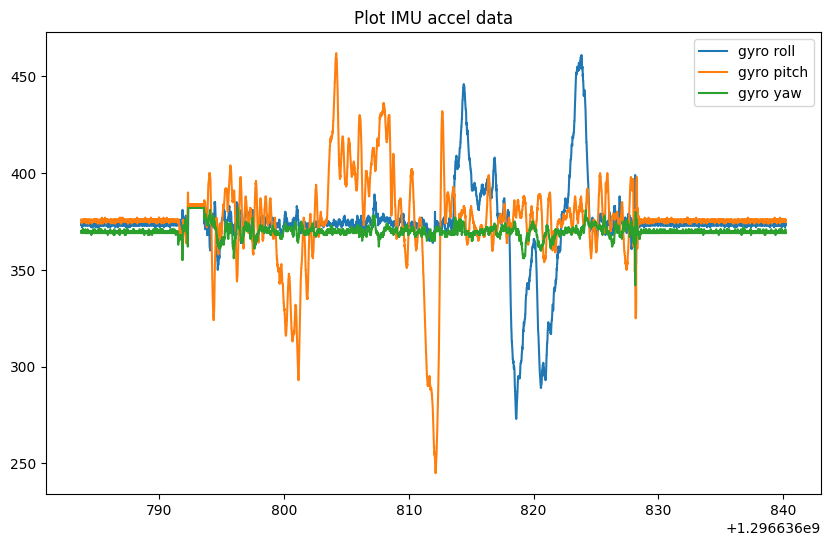

In [8]:
gyro_ordered = np.vstack([gyro[1,:], gyro[2,:], gyro[0,:]])

plt.figure(figsize = (10,6))
# plt.subplot(2,1,1)
for i in range(3):
    plt.plot(ts_imu,gyro_ordered[i,:], label = 'gyro '+ angle_names[i])
plt.title('Plot IMU accel data')
plt.legend()

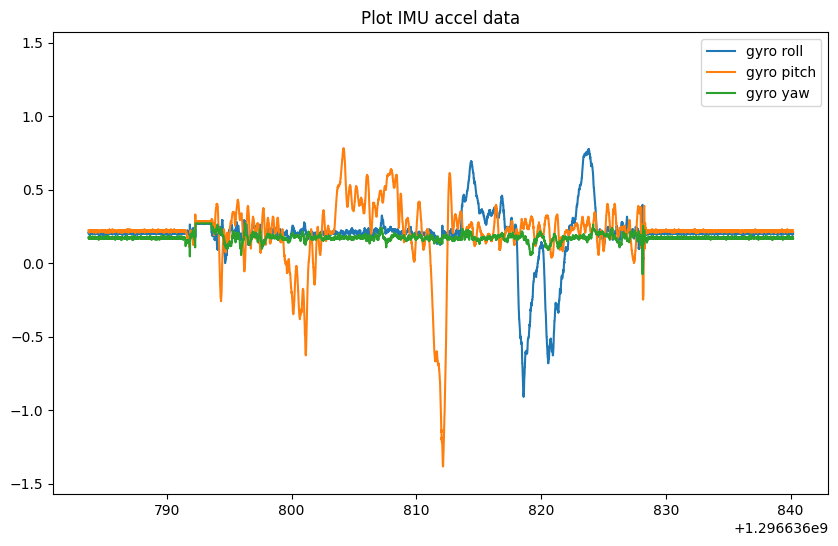

In [9]:
gyro_beta = 350
gyro_alpha = 250

gyro_imu = (gyro_ordered - np.ones(gyro_ordered.shape) * gyro_beta) * (3300/1023) / gyro_ordered
plt.figure(figsize = (10,6))
# plt.subplot(2,1,1)
for i in range(3):
    plt.plot(ts_imu,gyro_imu[i,:], label = 'gyro '+ angle_names[i])
plt.title('Plot IMU accel data')
plt.ylim(-np.pi/2, np.pi/2)
plt.legend()


## Automatic calibration
Below we can try to use first 100-ish values as training set for the "automatic calibration", and the rest will be used as testing set

### Training set

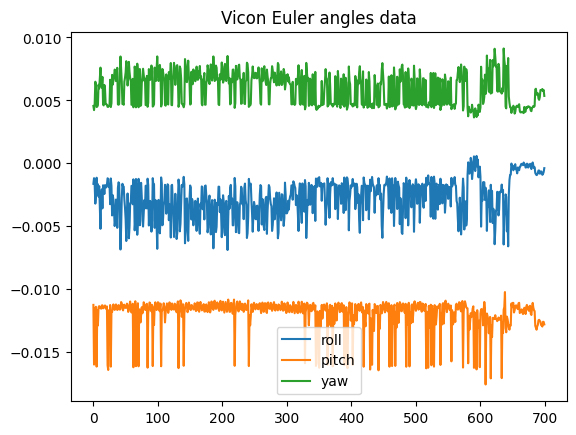

In [12]:
for i in range(3):
    plt.plot(euler_vicon[i,:700], label = angle_names[i])
plt.legend()
plt.title('Vicon Euler angles data')
plt.show()